In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
green=pd.read_csv(r'G:\job_test\train_1.csv',parse_dates=['datetime'])
green.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [3]:
green.datetime.dtype

dtype('<M8[ns]')

In [4]:
green.describe()

,row_id,energy
count,94992.000000,93092.000000
mean,47496.500000,1702.995014
std,27421.972723,369.322103
min,1.000000,866.388600
25%,23748.750000,1431.541100
50%,47496.500000,1654.465800
75%,71244.250000,1935.993450
max,94992.000000,3374.399600


In [5]:
green.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [6]:
import sklearn
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='mean',missing_values=np.nan)
imputer=imputer.fit(green[['energy']])
green['energy']=imputer.transform(green[['energy']])

In [7]:
green.isnull().sum()

row_id      0
datetime    0
energy      0
dtype: int64

In [8]:
green.datetime.value_counts()

2008-03-01 00:00:00    1
2015-05-22 13:00:00    1
2015-05-22 22:00:00    1
2015-05-22 21:00:00    1
2015-05-22 20:00:00    1
                      ..
2011-10-11 05:00:00    1
2011-10-11 04:00:00    1
2011-10-11 03:00:00    1
2011-10-11 02:00:00    1
2018-12-31 23:00:00    1
Name: datetime, Length: 94992, dtype: int64

In [9]:
green.energy.value_counts()

1702.995014    1900
1900.698800       9
1842.714900       8
1730.120000       8
1922.206000       8
               ... 
1906.510900       1
1886.005100       1
1872.792600       1
1976.484300       1
2180.217600       1
Name: energy, Length: 61309, dtype: int64

<AxesSubplot:xlabel='energy', ylabel='Count'>

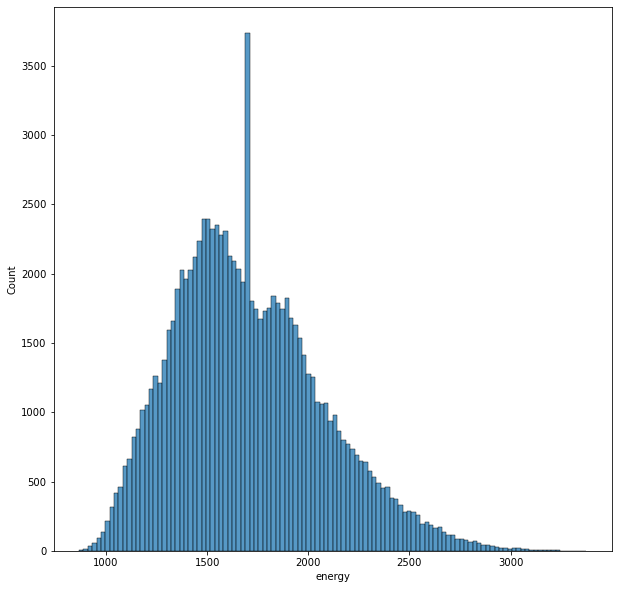

In [10]:
plt.figure(figsize=(10,10))
sns.histplot(x='energy',data=green)

In [11]:
green['green_year']=green.datetime.dt.year
green['green_year']

0        2008
1        2008
2        2008
3        2008
4        2008
         ... 
94987    2018
94988    2018
94989    2018
94990    2018
94991    2018
Name: green_year, Length: 94992, dtype: int64

In [12]:
green['green_month']=green.datetime.dt.month

In [13]:
green['green_hours']=green.datetime.dt.hour

In [14]:
green.head()

,row_id,datetime,energy,green_year,green_month,green_hours
0,1,2008-03-01 00:00:00,1259.985563,2008,3,0
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1
2,3,2008-03-01 02:00:00,1056.247500,2008,3,2
3,4,2008-03-01 03:00:00,1034.742000,2008,3,3
4,5,2008-03-01 04:00:00,1026.334500,2008,3,4


In [15]:
green.drop(columns='row_id',inplace=True)

<AxesSubplot:xlabel='green_year', ylabel='energy'>

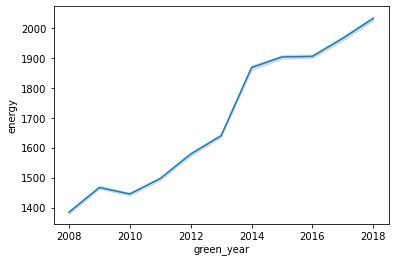

In [16]:
sns.lineplot(data=green,x='green_year',y='energy')

As we can clearly see there is upward trend. Some irregularity from 2010 to 2014.

In [17]:
green_energy_2008=green[(green['green_year']==2008)]
green_energy_2008.head()

,datetime,energy,green_year,green_month,green_hours
0,2008-03-01 00:00:00,1259.985563,2008,3,0
1,2008-03-01 01:00:00,1095.541500,2008,3,1
2,2008-03-01 02:00:00,1056.247500,2008,3,2
3,2008-03-01 03:00:00,1034.742000,2008,3,3
4,2008-03-01 04:00:00,1026.334500,2008,3,4


In [18]:
green_energy_2008.describe()

,energy,green_year,green_month,green_hours
count,7344.000000,7344.0,7344.000000,7344.000000
mean,1383.936383,2008.0,7.500000,11.500000
std,219.829865,0.0,2.874752,6.922658
min,866.388600,2008.0,3.000000,0.000000
25%,1226.145375,2008.0,5.000000,5.750000
50%,1369.553550,2008.0,7.500000,11.500000
75%,1523.588850,2008.0,10.000000,17.250000
max,2118.123000,2008.0,12.000000,23.000000


In [19]:
green_energy_2009=green[(green['green_year']==2009)]
green_energy_2009.head()

,datetime,energy,green_year,green_month,green_hours
7344,2009-01-01 00:00:00,1610.2674,2009,1,0
7345,2009-01-01 01:00:00,1471.4406,2009,1,1
7346,2009-01-01 02:00:00,1371.6864,2009,1,2
7347,2009-01-01 03:00:00,1301.6556,2009,1,3
7348,2009-01-01 04:00:00,1273.5198,2009,1,4


In [20]:
green_energy_2009.describe()

,energy,green_year,green_month,green_hours
count,8760.000000,8760.0,8760.000000,8760.000000
mean,1466.798697,2009.0,6.526027,11.500000
std,233.773097,0.0,3.448048,6.922582
min,911.282400,2009.0,1.000000,0.000000
25%,1301.126400,2009.0,4.000000,5.750000
50%,1461.365100,2009.0,7.000000,11.500000
75%,1628.268700,2009.0,10.000000,17.250000
max,2357.505800,2009.0,12.000000,23.000000


In [21]:
green_energy_2010=green[(green['green_year']==2010)]
green_energy_2010.head()

,datetime,energy,green_year,green_month,green_hours
16104,2010-01-01 00:00:00,1907.1104,2010,1,0
16105,2010-01-01 01:00:00,1771.7830,2010,1,1
16106,2010-01-01 02:00:00,1658.2826,2010,1,2
16107,2010-01-01 03:00:00,1584.3555,2010,1,3
16108,2010-01-01 04:00:00,1530.2625,2010,1,4


In [22]:
green_energy_2010.describe()

,energy,green_year,green_month,green_hours
count,8760.000000,8760.0,8760.000000,8760.000000
mean,1445.153492,2010.0,6.526027,11.500000
std,225.385342,0.0,3.448048,6.922582
min,921.844200,2010.0,1.000000,0.000000
25%,1286.553375,2010.0,4.000000,5.750000
50%,1440.158700,2010.0,7.000000,11.500000
75%,1599.729300,2010.0,10.000000,17.250000
max,2223.127400,2010.0,12.000000,23.000000


In [23]:
green_energy_2016=green[(green['green_year']==2016)]
green_energy_2016.head()

,datetime,energy,green_year,green_month,green_hours
68688,2016-01-01 00:00:00,2002.2470,2016,1,0
68689,2016-01-01 01:00:00,1843.3870,2016,1,1
68690,2016-01-01 02:00:00,1735.1178,2016,1,2
68691,2016-01-01 03:00:00,1666.1970,2016,1,3
68692,2016-01-01 04:00:00,1630.3924,2016,1,4


In [24]:
green_energy_2016.describe()

,energy,green_year,green_month,green_hours
count,8784.000000,8784.0,8784.000000,8784.000000
mean,1904.586368,2016.0,6.513661,11.500000
std,298.453297,0.0,3.451430,6.922581
min,1234.220000,2016.0,1.000000,0.000000
25%,1690.248075,2016.0,4.000000,5.750000
50%,1881.778950,2016.0,7.000000,11.500000
75%,2108.221425,2016.0,10.000000,17.250000
max,2900.680200,2016.0,12.000000,23.000000


In [25]:
green_energy_2017=green[(green['green_year']==2017)]
green_energy_2017.head()

,datetime,energy,green_year,green_month,green_hours
77472,2017-01-01 00:00:00,1740.5604,2017,1,0
77473,2017-01-01 01:00:00,1618.2288,2017,1,1
77474,2017-01-01 02:00:00,1534.7286,2017,1,2
77475,2017-01-01 03:00:00,1480.2885,2017,1,3
77476,2017-01-01 04:00:00,1452.6243,2017,1,4


In [26]:
green_energy_2017.describe()

,energy,green_year,green_month,green_hours
count,8760.000000,8760.0,8760.000000,8760.000000
mean,1964.847151,2017.0,6.526027,11.500000
std,343.795376,0.0,3.448048,6.922582
min,1243.746900,2017.0,1.000000,0.000000
25%,1702.995014,2017.0,4.000000,5.750000
50%,1926.480650,2017.0,7.000000,11.500000
75%,2181.434500,2017.0,10.000000,17.250000
max,3213.803600,2017.0,12.000000,23.000000


In [27]:
green_energy_2018=green[(green['green_year']==2018)]
green_energy_2018

,datetime,energy,green_year,green_month,green_hours
86232,2018-01-01 00:00:00,1642.762800,2018,1,0
86233,2018-01-01 01:00:00,1702.995014,2018,1,1
86234,2018-01-01 02:00:00,1463.655200,2018,1,2
86235,2018-01-01 03:00:00,1413.120800,2018,1,3
86236,2018-01-01 04:00:00,1385.879600,2018,1,4
...,...,...,...,...,...
94987,2018-12-31 19:00:00,2528.446800,2018,12,19
94988,2018-12-31 20:00:00,2461.883600,2018,12,20
94989,2018-12-31 21:00:00,2365.994400,2018,12,21
94990,2018-12-31 22:00:00,2342.942800,2018,12,22


In [28]:
green_energy_2018.describe()

,energy,green_year,green_month,green_hours
count,8760.000000,8760.0,8760.000000,8760.000000
mean,2031.270173,2018.0,6.526027,11.500000
std,351.679407,0.0,3.448048,6.922582
min,1295.207200,2018.0,1.000000,0.000000
25%,1763.091100,2018.0,4.000000,5.750000
50%,1980.119400,2018.0,7.000000,11.500000
75%,2268.147000,2018.0,10.000000,17.250000
max,3374.399600,2018.0,12.000000,23.000000


By perfoming EDA(exploratory data analysis), we can see there is increase in Mean and Max value from staring three years(2008 to 2010) to ending years(2016 to 2018) but  change is constant not drastic . That means their is upward tread and data is not stationary.

In [29]:
green_new=pd.read_csv(r'G:\job_test\train_1.csv',parse_dates=['datetime'],index_col='datetime')

green_new.drop(columns="row_id",inplace=True)

In [30]:
import sklearn
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='mean',missing_values=np.nan)
imputer=imputer.fit(green[['energy']])
green_new['energy']=imputer.transform(green_new[['energy']])

<AxesSubplot:xlabel='datetime', ylabel='energy'>

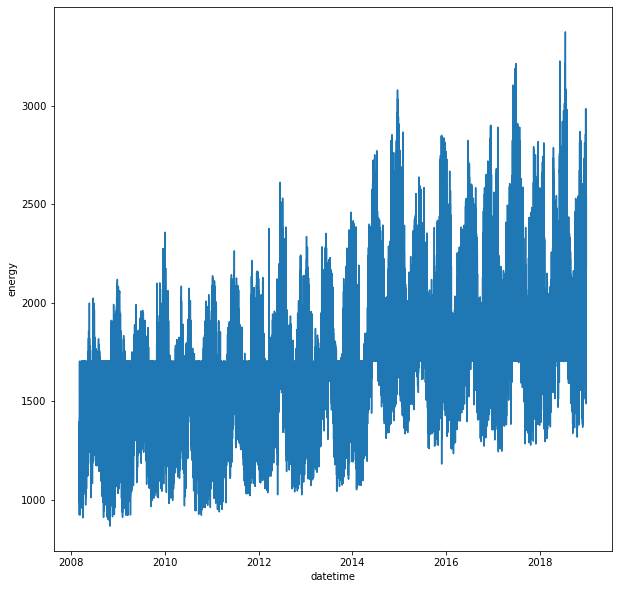

In [31]:
plt.figure(figsize=(10,10))
sns.lineplot(data=green_new,x='datetime',y='energy')

there is upward trend.

In [32]:
green_new.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


Convert non-stationary data to stationary

In [33]:
green_mean=green_new.rolling(window=365).mean()
green_std=green_new.rolling(window=365).std()
print(green_mean,green_std)

                          energy
datetime                        
2008-03-01 00:00:00          NaN
2008-03-01 01:00:00          NaN
2008-03-01 02:00:00          NaN
2008-03-01 03:00:00          NaN
2008-03-01 04:00:00          NaN
...                          ...
2018-12-31 19:00:00  2232.101471
2018-12-31 20:00:00  2231.640327
2018-12-31 21:00:00  2230.731118
2018-12-31 22:00:00  2229.661219
2018-12-31 23:00:00  2228.162314

[94992 rows x 1 columns]                          energy
datetime                       
2008-03-01 00:00:00         NaN
2008-03-01 01:00:00         NaN
2008-03-01 02:00:00         NaN
2008-03-01 03:00:00         NaN
2008-03-01 04:00:00         NaN
...                         ...
2018-12-31 19:00:00  399.600568
2018-12-31 20:00:00  399.236848
2018-12-31 21:00:00  398.549481
2018-12-31 22:00:00  397.719516
2018-12-31 23:00:00  396.868852

[94992 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

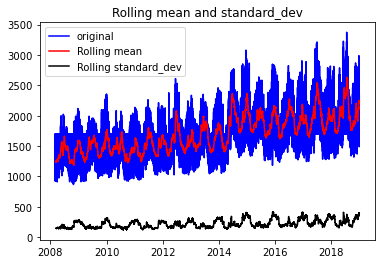

In [34]:
original_green=plt.plot(green_new,color='blue',label="original")
mean=plt.plot(green_mean,color='red',label="Rolling mean")
standard_dev=plt.plot(green_std,color='black',label="Rolling standard_dev")
plt.legend(loc='best')
plt.title('Rolling mean and standard_dev')
plt.show

Performing dickey-Fuller Test :
Null hypothesis : Data is not stationary ,
Alternate hypothesis : Data is  Stationary


In [35]:
from  statsmodels.tsa.stattools import adfuller
print('result of Dickey Fuller test: ')
green_test=adfuller(green_new["energy"],autolag='AIC')
green_output=pd.Series(green_test[0:4],index=['Test Statistic','p_value','lags used','number of observation used'])
for key,value in green_test[4].items():
    green_output['Critics Value (%s)'%key ]=value
 
print(green_output)


result of Dickey Fuller test: 
Test Statistic               -9.779563e+00
p_value                       6.790459e-17
lags used                     6.700000e+01
number of observation used    9.492400e+04
Critics Value (1%)           -3.430419e+00
Critics Value (5%)           -2.861570e+00
Critics Value (10%)          -2.566786e+00
dtype: float64


Null hypothesis will not be rejected and data is not stationary

<AxesSubplot:xlabel='datetime'>

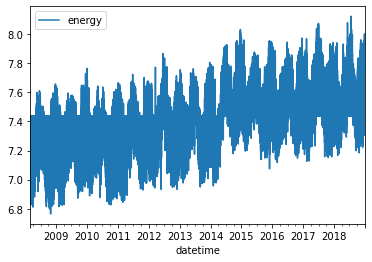

In [36]:
green_new_log=np.log(green_new)
green_new_log.plot()

In [37]:
movingAvg=green_new_log.rolling(window=365).mean()
movingStd=green_new_log.rolling(window=365).std()
print(movingAvg,movingStd)

                       energy
datetime                     
2008-03-01 00:00:00       NaN
2008-03-01 01:00:00       NaN
2008-03-01 02:00:00       NaN
2008-03-01 03:00:00       NaN
2008-03-01 04:00:00       NaN
...                       ...
2018-12-31 19:00:00  7.694121
2018-12-31 20:00:00  7.693939
2018-12-31 21:00:00  7.693580
2018-12-31 22:00:00  7.693157
2018-12-31 23:00:00  7.692544

[94992 rows x 1 columns]                        energy
datetime                     
2008-03-01 00:00:00       NaN
2008-03-01 01:00:00       NaN
2008-03-01 02:00:00       NaN
2008-03-01 03:00:00       NaN
2008-03-01 04:00:00       NaN
...                       ...
2018-12-31 19:00:00  0.184170
2018-12-31 20:00:00  0.184024
2018-12-31 21:00:00  0.183748
2018-12-31 22:00:00  0.183418
2018-12-31 23:00:00  0.183062

[94992 rows x 1 columns]


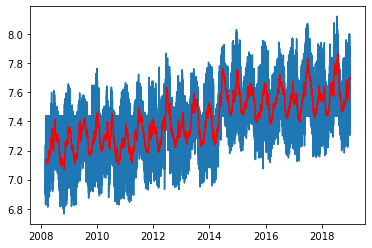

In [38]:
plt.plot(green_new_log)
plt.plot(movingAvg,color="red")

data is still not stationary

In [39]:
green_new_log_minus_moving_avg=green_new_log-movingAvg
green_new_log_minus_moving_avg.head(12)


green_new_log_minus_moving_avg.dropna(inplace=True)
green_new_log_minus_moving_avg.head(10)

,energy
datetime,
2008-03-16 04:00:00,-0.153514
2008-03-16 05:00:00,-0.152601
2008-03-16 06:00:00,-0.133229
2008-03-16 07:00:00,-0.092901
2008-03-16 08:00:00,-0.035650
2008-03-16 09:00:00,0.013761
2008-03-16 10:00:00,0.049123
2008-03-16 11:00:00,0.060757
2008-03-16 12:00:00,0.056896


result of Dickey Fuller test: 
Test Statistic                  -24.769674
p_value                           0.000000
lags used                        67.000000
number of observation used    94560.000000
Critics Value (1%)               -3.430419
Critics Value (5%)               -2.861571
Critics Value (10%)              -2.566786
dtype: float64


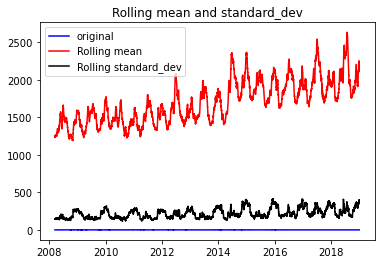

In [40]:
def green_function(earth):
    movingAvg=earth.rolling(window=365).mean()
    movingStd=earth.rolling(window=365).std()

    original_green=plt.plot(earth,color='blue',label="original")
    mean=plt.plot(green_mean,color='red',label="Rolling mean")
    standard_dev=plt.plot(green_std,color='black',label="Rolling standard_dev")
    plt.legend(loc='best')
    plt.title('Rolling mean and standard_dev')
    plt.show

    print('result of Dickey Fuller test: ')
    green_test=adfuller(earth["energy"],autolag='AIC')
    green_output=pd.Series(green_test[0:4],index=['Test Statistic','p_value','lags used','number of observation used'])
    for key,value in green_test[4].items():
        green_output['Critics Value (%s)'%key ]=value
 
    print(green_output)

green_function(green_new_log_minus_moving_avg)



    
    



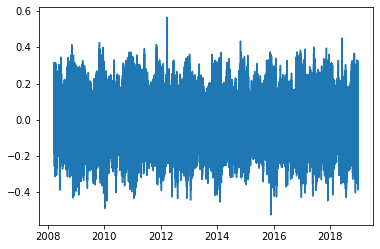

In [41]:
plt.plot(green_new_log_minus_moving_avg)

Now data is stationary

In [42]:
green_new_shift=green_new_log-green_new_log.shift()

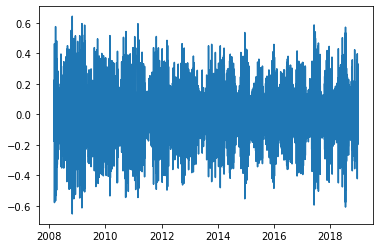

In [43]:
plt.plot(green_new_shift)

In [44]:
green_new_shift.dropna(inplace=True)

result of Dickey Fuller test: 
Test Statistic                  -56.124727
p_value                           0.000000
lags used                        67.000000
number of observation used    94923.000000
Critics Value (1%)               -3.430419
Critics Value (5%)               -2.861570
Critics Value (10%)              -2.566786
dtype: float64


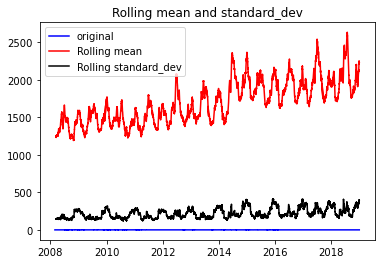

In [45]:
green_function(green_new_shift)

Now data is stationary

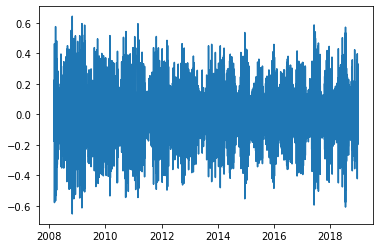

In [46]:
plt.plot(green_new_shift)

seasonality to non-seasonality

In [47]:
Seasonal_Decompose_green_new_log=seasonal_decompose(green_new_log,model="multiplicative",period=365)

In [48]:
trend=Seasonal_Decompose_green_new_log.trend
seasonal=Seasonal_Decompose_green_new_log.seasonal
residual=Seasonal_Decompose_green_new_log.resid

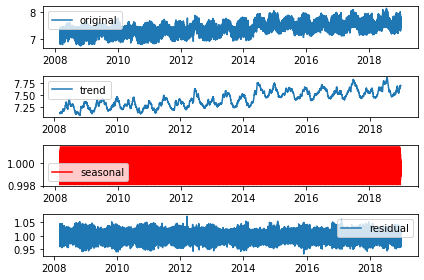

In [49]:
plt.subplot(411)
plt.plot(green_new_log,label='original')
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,color='red',label='seasonal')
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc="best")
plt.tight_layout()

performing auto correlation function to know value of p and paritial autocorrelation function to know value of q.

In [50]:
from statsmodels.tsa.stattools import acf,pacf

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

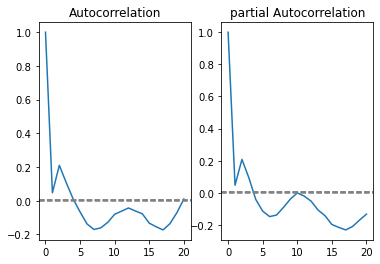

In [51]:
lag_acf=acf(green_new_shift,nlags=20)
lag_pacf=pacf(green_new_shift,nlags=20,method='ols')
#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(green_new_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(green_new_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(green_new_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(green_new_shift)),linestyle='--',color='gray')
plt.title('partial Autocorrelation')
plt.tight_layout



Performing arima for prediction and forcasting

In [52]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(green_new_log,order=(2,1,2))
result_ar=model.fit()





c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(green_new_log,order=(1,1,1))
result_ar1=model.fit()

c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [54]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(green_new_log,order=(1,1,0))
result_arima=model.fit()

c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\abxc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [55]:
predictions_arima=pd.Series(result_arima.fittedvalues,copy=True)
predictions_arima.head(100)

datetime
2008-03-01 00:00:00    0.000000
2008-03-01 01:00:00    7.138856
2008-03-01 02:00:00    6.992414
2008-03-01 03:00:00    6.960757
2008-03-01 04:00:00    6.940938
                         ...   
2008-03-04 23:00:00    7.227549
2008-03-05 00:00:00    7.153540
2008-03-05 01:00:00    7.074940
2008-03-05 02:00:00    7.008115
2008-03-05 03:00:00    6.976803
Length: 100, dtype: float64

In [56]:
#convert to cumulative sum
predictions_arima_cumsum=predictions_arima.cumsum()
predictions_arima_cumsum.head()

datetime
2008-03-01 00:00:00     0.000000
2008-03-01 01:00:00     7.138856
2008-03-01 02:00:00    14.131269
2008-03-01 03:00:00    21.092026
2008-03-01 04:00:00    28.032964
dtype: float64

In [57]:
prediction_arima_log=pd.Series(green_new_log['energy'].iat[0],index=green_new_log.index)
prediction_arima_log=prediction_arima_log.add(predictions_arima_cumsum,fill_value=0)



In [58]:
prediction_arima_exp=np.exp(prediction_arima_log)
prediction_arima_exp.head()



c:\Users\abxc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


datetime
2008-03-01 00:00:00    1.259986e+03
2008-03-01 01:00:00    1.587564e+06
2008-03-01 02:00:00    1.727818e+09
2008-03-01 03:00:00    1.821865e+12
2008-03-01 04:00:00    1.883333e+15
dtype: float64

In [59]:
green_new_log


,energy
datetime,
2008-03-01 00:00:00,7.138856
2008-03-01 01:00:00,6.999004
2008-03-01 02:00:00,6.962478
2008-03-01 03:00:00,6.941907
2008-03-01 04:00:00,6.933749
...,...
2018-12-31 19:00:00,7.835360
2018-12-31 20:00:00,7.808682
2018-12-31 21:00:00,7.768954


In [60]:
result_arima.predict(1,120912)


2008-03-01 01:00:00    7.138856
2008-03-01 02:00:00    6.992414
2008-03-01 03:00:00    6.960757
2008-03-01 04:00:00    6.940938
2008-03-01 05:00:00    6.933365
                         ...   
2021-12-15 20:00:00    7.683620
2021-12-15 21:00:00    7.683620
2021-12-15 22:00:00    7.683620
2021-12-15 23:00:00    7.683620
2021-12-16 00:00:00    7.683620
Freq: H, Name: predicted_mean, Length: 120912, dtype: float64

In [76]:
prediction_3yrs=result_arima.forecast(26305)
prediction_3yrs.head()




2019-01-01 00:00:00    7.683788
2019-01-01 01:00:00    7.683628
2019-01-01 02:00:00    7.683621
2019-01-01 03:00:00    7.683620
2019-01-01 04:00:00    7.683620
Freq: H, Name: predicted_mean, dtype: float64

In [77]:
prediction_3yrs_exp=np.exp(prediction_3yrs)

In [78]:
prediction_3yrs_exp.tail()

2021-12-31 20:00:00    2172.47032
2021-12-31 21:00:00    2172.47032
2021-12-31 22:00:00    2172.47032
2021-12-31 23:00:00    2172.47032
2022-01-01 00:00:00    2172.47032
Freq: H, Name: predicted_mean, dtype: float64

In [79]:
prediction_3yrs_exp.to_csv(r'G:\job_test\green_test1.csv')